In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import sklearn as sk

In [68]:
ng_futures_prices_df = pd.read_excel('raw_data/natgasfutures_prices.xlsx', index_col = 0, parse_dates = [0])

# Dropping all weekends where there is no pricing data (may cause issues in future)
ng_futures_prices_df.dropna(how = 'all', inplace = True)
ng_futures_prices_df

,NGF15 Comdty,NGG15 Comdty,NGH15 Comdty,NGJ15 Comdty,NGK15 Comdty,NGM15 Comdty,NGN15 Comdty,NGQ15 Comdty,NGU15 Comdty,NGV15 Comdty,...,NGH32 Comdty,NGJ32 Comdty,NGK32 Comdty,NGM32 Comdty,NGN32 Comdty,NGQ32 Comdty,NGU32 Comdty,NGV32 Comdty,NGX32 Comdty,NGZ32 Comdty
2014-12-01,4.007,4.009,3.953,3.648,3.619,3.642,3.669,3.676,3.658,3.686,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-12-02,3.874,3.877,3.831,3.568,3.548,3.574,3.605,3.613,3.597,3.623,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-12-03,3.805,3.808,3.761,3.514,3.501,3.531,3.562,3.571,3.555,3.580,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-12-04,3.649,3.661,3.613,3.419,3.411,3.440,3.474,3.483,3.469,3.496,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-12-05,3.802,3.823,3.774,3.528,3.518,3.545,3.575,3.583,3.567,3.594,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2026-01-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.493,3.021,3.007,3.146,3.300,3.350,3.330,3.394,3.585,4.000
2026-01-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.521,3.049,3.035,3.174,3.328,3.378,3.358,3.422,3.613,4.014
2026-01-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.557,3.085,3.071,3.210,3.364,3.414,3.394,3.458,3.649,4.050
2026-01-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.461,2.989,2.975,3.114,3.268,3.318,3.298,3.362,3.553,3.983


In [69]:
contract_list = []

for i in ng_futures_prices_df.columns:

    contract_list.append(i)

print(contract_list)

['NGF15 Comdty', 'NGG15 Comdty', 'NGH15 Comdty', 'NGJ15 Comdty', 'NGK15 Comdty', 'NGM15 Comdty', 'NGN15 Comdty', 'NGQ15 Comdty', 'NGU15 Comdty', 'NGV15 Comdty', 'NGX15 Comdty', 'NGZ15 Comdty', 'NGF16 Comdty', 'NGG16 Comdty', 'NGH16 Comdty', 'NGJ16 Comdty', 'NGK16 Comdty', 'NGM16 Comdty', 'NGN16 Comdty', 'NGQ16 Comdty', 'NGU16 Comdty', 'NGV16 Comdty', 'NGX16 Comdty', 'NGZ16 Comdty', 'NGF17 Comdty', 'NGG17 Comdty', 'NGH17 Comdty', 'NGJ17 Comdty', 'NGK17 Comdty', 'NGM17 Comdty', 'NGN17 Comdty', 'NGQ17 Comdty', 'NGU17 Comdty', 'NGV17 Comdty', 'NGX17 Comdty', 'NGZ17 Comdty', 'NGF18 Comdty', 'NGG18 Comdty', 'NGH18 Comdty', 'NGJ18 Comdty', 'NGK18 Comdty', 'NGM18 Comdty', 'NGN18 Comdty', 'NGQ18 Comdty', 'NGU18 Comdty', 'NGV18 Comdty', 'NGX18 Comdty', 'NGZ18 Comdty', 'NGF19 Comdty', 'NGG19 Comdty', 'NGH19 Comdty', 'NGJ19 Comdty', 'NGK19 Comdty', 'NGM19 Comdty', 'NGN19 Comdty', 'NGQ19 Comdty', 'NGU19 Comdty', 'NGV19 Comdty', 'NGX19 Comdty', 'NGZ19 Comdty', 'NGF20 Comdty', 'NGG20 Comdty', 'NGH20 

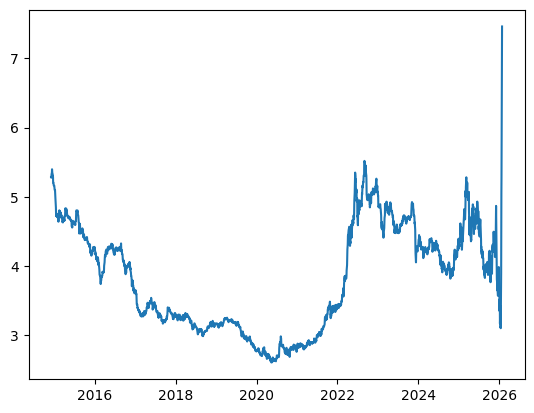

In [70]:
# Looking at feb 2026 contract
plt.plot(ng_futures_prices_df['NGG26 Comdty'])
plt.show()

In [ ]:
# Get log returns for all the contracts
ng_log_returns_df = pd.DataFrame()

for i in contract_list:
    ng_log_returns_df[i] = np.log(ng_futures_prices_df[i] / ng_futures_prices_df[i].shift(1))

ng_log_returns_df

C:\Users\limb.ch\AppData\Local\Temp\ipykernel_12028\4041760946.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ng_log_returns_df[i] = np.log(ng_futures_prices_df[i] / ng_futures_prices_df[i].shift(1))


,NGF15 Comdty,NGG15 Comdty,NGH15 Comdty,NGJ15 Comdty,NGK15 Comdty,NGM15 Comdty,NGN15 Comdty,NGQ15 Comdty,NGU15 Comdty,NGV15 Comdty,...,NGH32 Comdty,NGJ32 Comdty,NGK32 Comdty,NGM32 Comdty,NGN32 Comdty,NGQ32 Comdty,NGU32 Comdty,NGV32 Comdty,NGX32 Comdty,NGZ32 Comdty
2014-12-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-12-02,-0.033755,-0.033480,-0.031349,-0.022174,-0.019814,-0.018848,-0.017597,-0.017287,-0.016816,-0.017239,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-12-03,-0.017972,-0.017958,-0.018441,-0.015250,-0.013335,-0.012104,-0.012000,-0.011693,-0.011745,-0.011940,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-12-04,-0.041863,-0.039368,-0.040146,-0.027407,-0.026043,-0.026110,-0.025016,-0.024952,-0.024489,-0.023743,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-12-05,0.041074,0.043299,0.043597,0.031383,0.030887,0.030067,0.028659,0.028306,0.027859,0.027646,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2026-01-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.011669,-0.013480,-0.013543,-0.012948,-0.012348,-0.012165,-0.012237,-0.012008,-0.011372,-0.010198
2026-01-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.007984,0.009226,0.009269,0.008861,0.008449,0.008323,0.008373,0.008216,0.007780,0.003494
2026-01-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.010172,0.011738,0.011792,0.011278,0.010759,0.010601,0.010664,0.010465,0.009915,0.008929
2026-01-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.027360,-0.031613,-0.031759,-0.030363,-0.028953,-0.028522,-0.028693,-0.028154,-0.026661,-0.016682
